In [79]:
import numpy as np
import pandas as pd

In [80]:
clinical_data = pd.read_csv("inputs/features/clinical_data.csv")
radiomics = pd.read_csv("inputs/features/radiomics.csv")

output_train = pd.read_csv("y_train.csv")

In [81]:
clinical_data

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,Adenocarcinoma,0,0,l2,2,66.0000
1,371,large cell,0,2,l1,4,64.5722
2,246,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,nos,0,2,l1,3,59.3566
4,284,squamous cell carcinoma,0,3,l1,4,71.0554
...,...,...,...,...,...,...,...
295,261,squamous cell carcinoma,0,0,l1,1,87.1266
296,298,squamous cell carcinoma,0,0,l1,1,NaN
297,129,large cell,0,1,l1,3,59.8439
298,273,Adenocarcinoma,0,0,l2,1,70.0000


In [82]:
radiomics.columns

Index(['Unnamed: 0', 'shape', 'shape.1', 'shape.2', 'shape.3', 'shape.4',
       'shape.5', 'shape.6', 'shape.7', 'firstorder', 'firstorder.1',
       'firstorder.2', 'firstorder.3', 'firstorder.4', 'firstorder.5',
       'firstorder.6', 'firstorder.7', 'firstorder.8', 'firstorder.9',
       'firstorder.10', 'firstorder.11', 'firstorder.12', 'firstorder.13',
       'textural', 'textural.1', 'textural.2', 'textural.3', 'textural.4',
       'textural.5', 'textural.6', 'textural.7', 'textural.8', 'textural.9',
       'textural.10', 'textural.11', 'textural.12', 'textural.13',
       'textural.14', 'textural.15', 'textural.16', 'textural.17',
       'textural.18', 'textural.19', 'textural.20', 'textural.21',
       'textural.22', 'textural.23', 'textural.24', 'textural.25',
       'textural.26', 'textural.27', 'textural.28', 'textural.29',
       'textural.30'],
      dtype='object')

In [83]:
radiomics

,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,NaN,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
1,PatientID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
3,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547
4,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,2.1267453161798318,336.5736217607421,6761.904880588389,0.8071567846648176,0.0030263471540989176,791.2955059720019,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055
298,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,4.405808671502962,7158.438787435351,18591.140070820802,0.6133359978030384,0.0010222643954205016,1592.1900508318274,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346
299,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,7.254938625898857,4513.100699296329,8467.466888384817,0.511172534658928,0.001134970199763957,1030.1979529954301,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315
300,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,1.2311488388284484,40.14012424787426,1137.721789971685,0.9344729344729346,0.013536519694682055,525.6828294688723,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698


In [84]:
archive = np.load('inputs/images/patient_003.npz')
scan = archive['scan']
mask = archive['mask']

In [85]:
#print(scan)
scan.shape

(92, 92, 92)

In [86]:
sliced_scan = scan[:,:,4]
sliced_scan = np.squeeze(sliced_scan)
sliced_scan.shape

(92, 92)

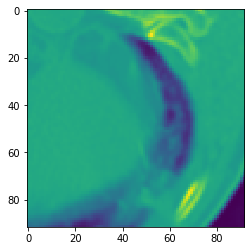

<Figure size 360x360 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt

plt.imshow(sliced_scan)
plt.figure(figsize=(5,5))
plt.show()

In [88]:
np.expand_dims(scan,-1).shape

(92, 92, 92, 1)

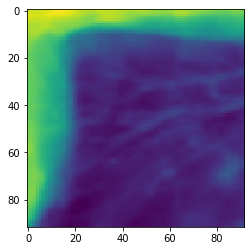

<Figure size 360x360 with 0 Axes>

In [89]:
plt.imshow(scan.sum(axis=1))
plt.figure(figsize=(5,5))
plt.show()

In [90]:
scan.sum(axis=1).shape

(92, 92)

In [91]:
scan.flatten().shape

(778688,)

In [92]:
from os import listdir
from os.path import isfile, join

mypath = 'inputs/images'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(onlyfiles)

300

In [93]:
images_arrays = []

for i in range(len(onlyfiles)):
    archive = np.load(f'inputs/images/{onlyfiles[i]}')
    scan = archive['scan']
    scan = scan.flatten()
    #mask = archive['mask']
    images_arrays.append(scan)

In [94]:
images_arrays[0].shape

(778688,)

In [95]:
np.array(images_arrays).shape

(300, 778688)

## linear regression on all 800k components

In [96]:
output_train
y_train = output_train.SurvivalTime

In [97]:
y_train

0      1378
1       379
2       573
3       959
4      2119
       ... 
295    1540
296     946
297     559
298    1952
299     858
Name: SurvivalTime, Length: 300, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(images_arrays, y_train, test_size=0.3, random_state=3)

In [99]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(f"Training set R2 score : {reg.score(X_train, y_train)}")
print(f"Training set R2 score : {reg.score(X_valid, y_valid)}")

Training set R2 score : 1.0
Training set R2 score : -0.4944509338218883


In [100]:
from sklearn.metrics import r2_score

y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

-1.8786086842842087

In [101]:
ytrain_pred = reg.predict(X_train)

print(f'RMSE on Training set : {np.sqrt(np.mean((ytrain_pred - y_train)**2))}')
print(f'RMSE on Validation set : {np.sqrt(np.mean((y_pred - y_valid)**2))}')

RMSE on Validation set : 814.9320872309819


In [102]:
data = {'actual':y_valid, 'predicted':y_pred}
pd.DataFrame(data=data, columns = ['actual','predicted'])

,actual,predicted
84,1280,665.606585
217,2240,1776.822938
211,618,1364.362870
286,1456,1009.412810
31,582,1008.534649
...,...,...
198,161,579.489568
246,799,1518.400231
292,2212,915.773106
101,456,1307.820574


## PCA

In [103]:
from sklearn.preprocessing import StandardScaler

images_arrays = StandardScaler().fit_transform(images_arrays)
print("observations centrees reduites : ",images_arrays)

observations centrees reduites :  [[-1.3137082  -0.91478084 -0.21169559 ...  0.25329497  0.21390169
   0.24103344]
 [-1.59848174 -1.62538465 -1.60907031 ... -2.08269375 -2.1225788
  -2.16190201]
 [-1.66202625 -1.68185647 -1.6420606  ... -1.8722209  -1.93907204
  -1.92702862]
 ...
 [ 0.67499959  0.66172431  0.65076502 ...  0.36502747  0.3431318
   0.34685552]
 [-1.41961571 -1.43479223 -1.45354462 ... -1.81245701 -1.86670317
  -1.90379939]
 [-1.61966324 -1.62773764 -1.63263481 ... -1.47985795 -1.39630555
  -1.31016335]]


In [104]:
images_arrays.shape

(300, 778688)

In [105]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(images_arrays) 

array([[ 2.97271725e+02, -8.88294339e+01,  1.44867523e+02, ...,
         2.78572125e+00,  4.20252653e+00,  2.35418079e-13],
       [-3.58517381e+02,  5.52152610e+01,  5.67254755e+02, ...,
         2.22811010e+00, -1.44045415e-02,  2.35418079e-13],
       [ 5.73431901e+02, -6.64943758e+01, -3.20024089e+02, ...,
         1.78616011e+01, -1.41801290e+00,  2.35418079e-13],
       ...,
       [-2.11566127e+02,  3.93485004e+01,  2.93671450e+02, ...,
         1.59519452e+00, -3.99872080e+00,  2.35418079e-13],
       [ 3.92437290e+02,  8.55158897e+01,  4.51368082e+02, ...,
         1.80394321e+00,  2.27803630e+00,  2.35418079e-13],
       [ 8.09768777e+01,  1.56786850e+01, -2.20112090e+02, ...,
        -4.51957115e+00,  3.43083011e+00,  2.35418079e-13]])

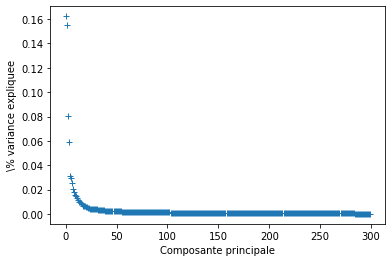

In [106]:
plt.plot(pca.explained_variance_ratio_,'+')
plt.xlabel('Composante principale')
plt.ylabel('\% variance expliquee')
plt.show()

In [107]:
print(len(pca.explained_variance_ratio_))

300


In [108]:
sum(pca.explained_variance_ratio_[:20])

0.6915911271763453

In [109]:
pca.components_.shape

(300, 778688)

In [110]:
pca_X = pca.components_[:,:20]

In [111]:
pca_X.shape

(300, 20)

In [112]:
from sklearn.model_selection import train_test_split
y_train = output_train.SurvivalTime

X_train, X_valid, y_train, y_valid = train_test_split(pca_X, y_train, test_size=0.3, random_state=3)

In [113]:
reg = LinearRegression().fit(X_train, y_train)

print(f"Training set R2 score : {reg.score(X_train, y_train)}")
print(f"Training set R2 score : {reg.score(X_valid, y_valid)}")

Training set R2 score : 0.08258382747408721
Training set R2 score : -0.1272631146211085


In [114]:
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

-8.616899300820034

In [115]:
ytrain_pred = reg.predict(X_train)

print(f'RMSE on Training set : {np.sqrt(np.mean((ytrain_pred - y_train)**2))}')
print(f'RMSE on Validation set : {np.sqrt(np.mean((y_pred - y_valid)**2))}')

RMSE on Validation set : 707.7717692524049


In [116]:
data = {'actual':y_valid, 'predicted':y_pred}
pd.DataFrame(data=data, columns = ['actual','predicted'])

,actual,predicted
84,1280,955.434346
217,2240,581.038512
211,618,811.537415
286,1456,695.660906
31,582,657.494261
...,...,...
198,161,1598.919808
246,799,562.514422
292,2212,709.583790
101,456,992.326916


## Random forest after PCA

In [117]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0,max_depth = 2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_valid)

In [125]:
y_pred = regressor.predict(X_valid)

In [128]:
ytrain_pred = regressor.predict(X_train)

print(f'RMSE on Training set : {np.sqrt(np.mean((ytrain_pred - y_train)**2))}')
print(f'RMSE on Validation set : {np.sqrt(np.mean((y_pred - y_valid)**2))}')

RMSE on Training set : 678.1281713227494
RMSE on Validation set : 687.7078822163244


In [129]:
print(f" standard dev of y_valid : {np.std(y_valid)}")

 standard dev of y_valid : 666.6234512845084


In [357]:
data = {'actual':y_valid, 'predicted':y_pred}
pd.DataFrame(data=data, columns = ['actual','predicted'])

,actual,predicted
84,1280,1049.822633
217,2240,878.592030
211,618,1026.567132
286,1456,867.540643
31,582,601.356783
...,...,...
198,161,1181.749662
246,799,664.982715
292,2212,861.302581
101,456,941.870282


## Keras CNN

In [26]:
images = []

for i in range(len(onlyfiles)):
    archive = np.load(f'inputs/images/{onlyfiles[i]}')
    scan = archive['scan']
    images.append(scan)

In [28]:
np.array(images).shape

(300, 92, 92, 92)

In [387]:
print(images[0].shape)
#images[0]

(92, 92, 92)


In [30]:
from sklearn.model_selection import train_test_split

y_train = output_train.SurvivalTime

X_train, X_valid, y_train, y_valid = train_test_split(images, y_train, test_size=0.3, random_state=3)
X_train = np.array(X_train)/np.max(X_train)
X_valid = np.array(X_valid)/np.max(X_valid)

In [31]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
def createModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(92, 92, 92)))
    tf.keras.layers.BatchNormalization()
    model.add(layers.MaxPooling2D((4, 4)))
    tf.keras.layers.BatchNormalization()
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    tf.keras.layers.BatchNormalization()
    #model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    #tf.keras.layers.BatchNormalization()
    model.add(layers.MaxPooling2D((4, 4)))
    tf.keras.layers.BatchNormalization()
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    tf.keras.layers.BatchNormalization()
    model.add(layers.Dense(128,activation='relu'))
    tf.keras.layers.BatchNormalization()
    model.add(layers.Dense(64,activation='relu'))
    tf.keras.layers.BatchNormalization()
    model.add(layers.Dense(32,activation='relu')
    tf.keras.layers.BatchNormalization()
    model.add(layers.Dense(1))
    #model.summary()
    
    #optimizer = SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

model = createModel()

## TRYING OUT MANY CNN STRUCTURES - TATONNEMENT

### RMSE = SQUARE ROOT OF THE SMALLEST val_loss FOUND BY CNN ?

In [75]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(92, 92, 92)))
tf.keras.layers.BatchNormalization()
model.add(layers.MaxPooling2D((4, 4)))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf.keras.layers.BatchNormalization()
#model.add(layers.Conv2D(64, (5, 5), activation='relu'))
#tf.keras.layers.BatchNormalization()
model.add(layers.MaxPooling2D((4, 4)))
tf.keras.layers.BatchNormalization()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Dense(32, activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Dense(1))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 90, 90, 32)        26528     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_56 (Dense)             (None, 32)              

In [76]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size = 4) 

Epoch 1/10
53/53 [==============================] - 4s 78ms/step - loss: 813691.0000 - mse: 813691.0000 - val_loss: 490093.6562 - val_mse: 490093.6562
Epoch 2/10
53/53 [==============================] - 4s 70ms/step - loss: 659354.8125 - mse: 659354.8125 - val_loss: 460982.3438 - val_mse: 460982.3438
Epoch 3/10
53/53 [==============================] - 4s 70ms/step - loss: 615414.1875 - mse: 615414.1875 - val_loss: 443765.5938 - val_mse: 443765.5938
Epoch 4/10
53/53 [==============================] - 4s 71ms/step - loss: 597271.8750 - mse: 597271.8750 - val_loss: 491806.6250 - val_mse: 491806.6250
Epoch 5/10
53/53 [==============================] - 4s 72ms/step - loss: 600394.8750 - mse: 600394.8750 - val_loss: 492500.7500 - val_mse: 492500.7500
Epoch 6/10
53/53 [==============================] - 4s 70ms/step - loss: 597160.0625 - mse: 597160.0625 - val_loss: 454509.9062 - val_mse: 454509.9062
Epoch 7/10
53/53 [==============================] - 4s 73ms/step - loss: 601080.5625 - mse: 60

In [77]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(92, 92, 92)))
tf.keras.layers.BatchNormalization()
model.add(layers.MaxPooling2D((4, 4)))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.MaxPooling2D((4, 4)))
tf.keras.layers.BatchNormalization()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Dense(32, activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Dense(1))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 90, 90, 32)        26528     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)             

In [78]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size = 4) 

Epoch 1/10
53/53 [==============================] - 6s 109ms/step - loss: 851850.4375 - mse: 851850.4375 - val_loss: 472605.2500 - val_mse: 472605.2500
Epoch 2/10
53/53 [==============================] - 5s 99ms/step - loss: 671443.6875 - mse: 671443.6875 - val_loss: 449986.0312 - val_mse: 449986.0312
Epoch 3/10
53/53 [==============================] - 6s 104ms/step - loss: 643053.1250 - mse: 643053.1250 - val_loss: 598189.4375 - val_mse: 598189.4375
Epoch 4/10
53/53 [==============================] - 5s 102ms/step - loss: 597195.0000 - mse: 597195.0000 - val_loss: 469557.0312 - val_mse: 469557.0312
Epoch 5/10
53/53 [==============================] - 6s 112ms/step - loss: 715265.0000 - mse: 715265.0000 - val_loss: 565237.9375 - val_mse: 565237.9375
Epoch 6/10
53/53 [==============================] - 5s 97ms/step - loss: 641476.5000 - mse: 641476.5000 - val_loss: 467440.5312 - val_mse: 467440.5312
Epoch 7/10
53/53 [==============================] - 5s 98ms/step - loss: 579714.1250 - mse

In [71]:
model = models.Sequential()
model.add(layers.Conv2D(64, (7, 7), activation='relu', input_shape=(92, 92, 92), strides = 2))
tf.keras.layers.BatchNormalization()
model.add(layers.MaxPooling2D((4, 4), strides = 2))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Conv2D(1024, (1, 1), activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.MaxPooling2D((4, 4)))
tf.keras.layers.BatchNormalization()
model.add(layers.Flatten())


model.add(layers.Dense(128,activation='relu'))
tf.keras.layers.BatchNormalization()

model.add(layers.Dense(32,activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(layers.Dense(1))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 43, 43, 64)        288576    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 20, 20, 64)        4160      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 18, 18, 128)       8320      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 512)     

In [69]:
#from keras.optimizers import SGD 

#optimizer = SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
#model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())
checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size = 4)

#model.load_weights(checkpoint_filepath)


Epoch 1/10
53/53 [==============================] - 12s 219ms/step - loss: 884405.8125 - mse: 884405.8125 - val_loss: 827964.5625 - val_mse: 827964.5625
Epoch 2/10
53/53 [==============================] - 13s 239ms/step - loss: 772241.4375 - mse: 772241.4375 - val_loss: 495205.0625 - val_mse: 495205.0625
Epoch 3/10
53/53 [==============================] - 11s 217ms/step - loss: 681413.8750 - mse: 681413.8750 - val_loss: 764825.2500 - val_mse: 764825.2500
Epoch 4/10
53/53 [==============================] - 11s 216ms/step - loss: 815184.0625 - mse: 815184.0625 - val_loss: 455858.3438 - val_mse: 455858.3438
Epoch 5/10
53/53 [==============================] - 12s 218ms/step - loss: 703490.8125 - mse: 703490.8125 - val_loss: 536669.1875 - val_mse: 536669.1875
Epoch 6/10
53/53 [==============================] - 12s 229ms/step - loss: 650496.5625 - mse: 650496.5625 - val_loss: 543545.0000 - val_mse: 543545.0000
Epoch 7/10
53/53 [==============================] - 12s 218ms/step - loss: 607015.